In [27]:
import pandas as pd
import numpy as np
import time
import pickle
import json
from datetime import date
from geopy.geocoders import Nominatim
geolocator = Nominatim()


In [48]:
with open('neighborhoods.geojson') as f:
    geo_raw = json.load(f)
with open('p_file/se2sba.p', 'rb') as f:
    se2sba = pickle.load(f)

In [97]:
#geo["features"][0]
geolocator = Nominatim()
area =set(se2sba.keys())
tmp_dict={}
count=0

for geo in geo_raw['features']:
    if(geo['properties']['name'] in area):
        #area_a.append(geo['properties']['name'])
        count+=1
        #location = geolocator.reverse(str(geo['geometry']['coordinates'][1]) +','+ str(geo['geometry']['coordinates'][0]))
        #tmp_dict[geo['properties']['name']]=int(location.raw['address']['postcode'])
count

116

In [88]:
df = pd.DataFrame(list(tmp_dict.items()), columns=['area','zip'])

In [95]:
df.to_csv('area2zip.csv')

In [51]:
'geo["features"][0]['geometry']['coordinates'][0]

-73.847201

139

/Users/netjimmy/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


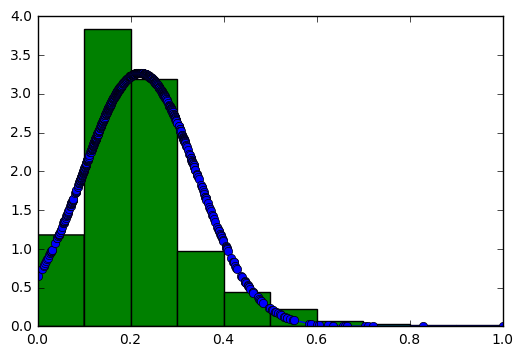

In [121]:
import scipy.stats as stats
import matplotlib

import matplotlib.pyplot as plt
matplotlib.use('qt5agg')

index_list.sort()

fit = stats.norm.pdf(index_list, np.mean(index_list), np.std(index_list))  #this is a fitting indeed

pl.plot(index_list,fit,'-o')

pl.hist(index_list,normed=True)      #use this to draw histogram of your data



pl.show()

In [138]:
furman2 = pd.read_csv('raw_data/sbatransform(asking).csv')
area=furman2['SBA'].tolist()
area2=furman2['CD'].tolist()

f2={}
for idx, ele in enumerate(area):
    f2[ele]=area2[idx]
    
with open('p_file/f2.p','wb')as f:
    pickle.dump(f2, f)

In [143]:
furman = pd.read_csv('raw_data/sbatransform(furman version).csv')
sba=furman['SBA'].tolist()
area=furman['Area'].tolist()

f={}
for idx, ele in enumerate(sba):
    f[ele]=area[idx]
    
with open('p_file/f1.p','wb')as ff:
    pickle.dump(f, ff)

In [7]:
with open('p_file/se2sba.p','rb') as f:
    trans = pickle.load(f)

with open('p_file/supply.p','rb') as f:
    supply = pickle.load(f)

with open('p_file/f1.p','rb') as f:
    f1 = pickle.load(f)

with open('p_file/f2.p','rb') as f:
    f2 = pickle.load(f)

target = pd.read_csv('raw_data/target variable matrix_1.csv', header=0, delimiter=',')
area = target['Area'].tolist()
target = target.drop('Area', 1)

column = target.columns

#create dict
data_id ={}

for nei in area:
    data_id[nei]={}
    for year in list(range(2009, 2015)):
        data_id[nei][year]={}
        data_id[nei]['sba']=trans[nei]
        data_id[nei]['f1']=f1[trans[nei]]
        data_id[nei]['f2']=f2[trans[nei]]
        for month in list(range(1, 13)):
            data_id[nei][year][month]={}

for col in column:
    col_tmp = target[col].tolist()
    year=int(col.split('/')[2])+2000
    month=int(col.split('/')[0])
    for r_idx, ele in enumerate(col_tmp):
        tmp_month={}
        if not ele:
            tmp_month['index']= 0
        else:
            tmp_month['index']= ele
        try:
            tmp_month['supply']=supply[year][area[r_idx]][month]['supply']
        except:
            tmp_month['supply']=0
        data_id[area[r_idx]][year][month]=tmp_month

# save dict
#with open("p_file/data_id.p", "wb") as f:
#    pickle.dump(data_id, f)
#with open('p_file/neighbor.p','wb') as f:
#    pickle.dump(area, f)

In [2]:
with open ("p_file/input.p",'rb') as f:
    df = pickle.load(f)

In [3]:
from sklearn.model_selection import ParameterGrid
param_grid = {'a': [1, 2], 'b': [True, False]}

In [4]:
param_grid

{'a': [1, 2], 'b': [True, False]}

In [9]:
list(ParameterGrid(param_grid))

[{'a': 1, 'b': True},
 {'a': 1, 'b': False},
 {'a': 2, 'b': True},
 {'a': 2, 'b': False}]

In [6]:
grid = [{'kernel': ['linear']}, {'kernel': ['rbf'], 'gamma': [1, 10]}]

In [10]:
list(ParameterGrid(grid))

[{'kernel': 'linear'},
 {'gamma': 1, 'kernel': 'rbf'},
 {'gamma': 10, 'kernel': 'rbf'}]

In [11]:
ParameterGrid(grid)[1]

{'gamma': 1, 'kernel': 'rbf'}